<a href="https://colab.research.google.com/github/moatazaymane/Quora_Question_Pairs/blob/main/Quora_Question_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset

In [1]:
import os

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          14738        395  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1323         35  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            805         32  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [10]:
!kaggle competitions download -c quora-question-pairs

100% 309M/309M [00:12<00:00, 23.7MB/s]
100% 309M/309M [00:12<00:00, 26.2MB/s]


In [11]:
!pwd

/content


In [12]:
os.getcwd()

'/content'

In [13]:
!unzip /content/quora-question-pairs.zip
!unzip /content/test.csv.zip
!unzip /content/train.csv.zip

Archive:  /content/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           
Archive:  /content/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                y

Archive:  /content/train.csv.zip
  inflating: train.csv               y



In [14]:
import os
os.stat("/content/train.csv"), os.stat("/content/test.csv")

(os.stat_result(st_mode=33188, st_ino=5243096, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=63399110, st_atime=1489120921, st_mtime=1488918845, st_ctime=1684249880),
 os.stat_result(st_mode=33188, st_ino=5243093, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=477592983, st_atime=1528716208, st_mtime=1528716208, st_ctime=1684249880))

# Exploring the train test and sample submission files

In [15]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
!unzip quora-question-pairs.zip

Archive:  quora-question-pairs.zip
replace sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv.zip  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                y
y

replace test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: test.csv.zip            
replace train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: train.csv.zip           y



In [17]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [18]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [19]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [20]:
df_val = pd.read_csv("test.csv", nrows=5000)

In [21]:
df_val.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [22]:
df_train.shape

(404290, 6)

In [23]:
df_test.shape

(2345796, 3)

In [24]:
pd.set_option('display.max_colwidth', None)
df_test.tail(20)

,test_id,question1,question2
2345776,2345776,How do I get more traffic in along U.K. business?,Who can I get more traffic for a website?
2345777,2345777,How does high useless?,Why do rainforests polymers high biodiversity?
2345778,2345778,What are the measures to correct would balance of trade deficit?,Why was the trade deficit so high used India in the 2000s?
2345779,2345779,How do I fax referring document from Malaysia to the US?,"How can I send a where fax from Australia to Bihar, India?"
2345780,2345780,Why is the cost of living in Namibia?,How much in US dollars do I need to live at an average living standard in Namibia for a here month?
2345781,2345781,What is a diet plan for a 21 year airdna.co female?,What is healthy Diet Chat test 22 year old female?
2345782,2345782,Is there any need of who reservation in education based on caste reservation?,Why do low caste people get India still need reservation?
2345783,2345783,"I have this belief that even if I have an amazing product media service, no company would give me a chance even to present it, because I don't have a established company, no credibility, and no offices. Would they just dismiss everything I say?",I hate my parents because they don't understand me. They don't even her want to listen to me. Can I disappear from them and start life elsewhere?
2345784,2345784,Can I change myself?,How can I change myself?
2345785,2345785,What are the best mortgage companies to make for?,What does a Quora BNBR asian look like?


### Example of two similar questions

In [25]:
df_test.query("test_id==2345784")

,test_id,question1,question2
2345784,2345784,Can I change myself?,How can I change myself?


### Example of two different questions

---



In [26]:
df_test.query("test_id==23457")

,test_id,question1,question2
23457,23457,How can we show the form in Microsoft Visual Studio 2015?,"If I buy Microsoft Visual Studio 2015, can I use the license key to install Visual Studio 2013?"


### Sample submission

In [27]:
sample_submission.head()

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


### Handling null values

In [28]:
df_train.shape

(404290, 6)

In [29]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [30]:
df_train[df_train.question1.isnull() == True]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronounciation of my Chinese name?,0


In [31]:
df_train = df_train[df_train.id != 363362]

In [32]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       2
is_duplicate    0
dtype: int64

In [33]:
df_train[df_train.question2.isnull() == True]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [34]:
df_train.at[105780,'question2']= df_train.at[201841,'question1']
df_train = df_train[df_train.question2.isnull() != True]

In [35]:
df_train[df_train.id == 105780 ]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,How can I create an Android app?,0


In [36]:
df_train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [37]:
df_train.shape[0], df_test.shape[0]

(404288, 2345796)

### Average number of words in the training set's questions


In [38]:
snt = "How can I develop android app?"
number_of_words = len(snt.split(' '))

In [39]:
mean_words_q1 = df_train.question1.apply(lambda x: len(x.split(' '))).mean()
mean_words_q2 = df_train.question2.apply(lambda x: len(x.split(' '))).mean()

In [40]:
mean_words_q1, mean_words_q2

(10.944626108120943, 11.185135349058097)

### Average number of characters in the training set's questions

In [41]:
mean_carac_q1 = df_train.question1.apply(lambda x: len(x)).mean()
mean_carac_q2 = df_train.question2.apply(lambda x: len(x)).mean()

In [42]:
mean_carac_q1, mean_carac_q2

(59.53692417286687, 60.108437549469684)

### Max min number of words in a question 

In [43]:
max_words_q1 = df_train.question1.apply(lambda x: len(x.split(' '))).max()
max_words_q2 = df_train.question2.apply(lambda x: len(x.split(' '))).max()

In [44]:
max_words_q1, max_words_q2

(125, 237)

In [45]:
min_words_q1 = df_train.question1.apply(lambda x: len(x.split(' '))).min()
min_words_q2 = df_train.question2.apply(lambda x: len(x.split(' '))).min()

In [46]:
min_words_q1, min_words_q2

(1, 1)

In [47]:
s_temp = df_train.question2.apply(lambda x: len(x.split(' ')))
df_train_e = df_train.copy()
df_train_e['q1_word_count'] =df_train.question1.apply(lambda x: len(x.split(' ')))
df_train_e['q2_word_count'] =df_train.question2.apply(lambda x: len(x.split(' ')))

# EDA : Topic modeling (LDA & NMF)

LDA topic modeling techniques that generates topics based on word frequency from a given set of documents, useful for finding reasonably accurate mixtures of topics within a given doc.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

def lda_topic_modeling(dataframe, text_column, num_topics=10):
    # Preprocess the text
    dataframe['preprocessed_text'] = dataframe[text_column].apply(preprocess_text)
    
    # Create dictionary and corpus from preprocessed text
    dictionary = Dictionary(dataframe['preprocessed_text'])
    corpus = [dictionary.doc2bow(doc) for doc in dataframe['preprocessed_text']]
    
    # Build LDA model
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        eta='auto'
    )
    
    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=dataframe['preprocessed_text'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Print topics and coherence score
    print(f"Coherence Score: {coherence_lda:.3f}")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx} \nWords: {topic}\n")
        
    # Create word cloud for each topic
    for idx in range(num_topics):
        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(idx, topn=20))))
        plt.axis("off")
        plt.title(f"Topic #{idx}")
        plt.show()

Coherence Score: 0.262
Topic: 0 
Words: 0.047*"get" + 0.028*"people" + 0.019*"quora" + 0.014*"use" + 0.014*"much" + 0.013*"someone" + 0.013*"think" + 0.013*"question" + 0.012*"many" + 0.011*"without"

Topic: 1 
Words: 0.066*"best" + 0.024*"way" + 0.023*"would" + 0.016*"time" + 0.015*"wa" + 0.015*"life" + 0.015*"year" + 0.015*"know" + 0.013*"thing" + 0.013*"ha"

Topic: 2 
Words: 0.024*"difference" + 0.021*"indian" + 0.015*"note" + 0.013*"woman" + 0.013*"number" + 0.012*"used" + 0.010*"black" + 0.009*"word" + 0.009*"help" + 0.009*"example"

Topic: 3 
Words: 0.036*"india" + 0.031*"good" + 0.026*"make" + 0.018*"money" + 0.013*"movie" + 0.013*"job" + 0.012*"better" + 0.012*"trump" + 0.011*"u" + 0.011*"online"

Topic: 4 
Words: 0.064*"doe" + 0.031*"like" + 0.023*"one" + 0.013*"work" + 0.010*"girl" + 0.010*"mean" + 0.010*"feel" + 0.009*"take" + 0.009*"go" + 0.009*"english"



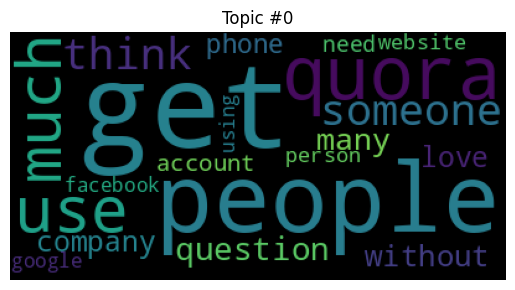

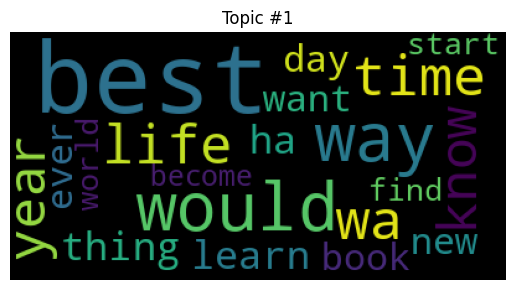

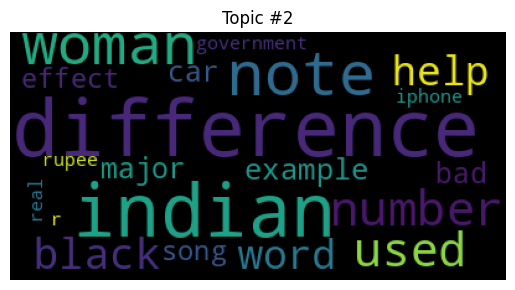

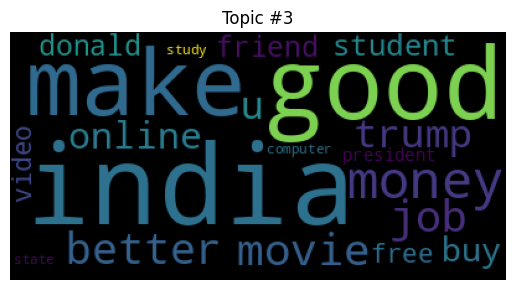

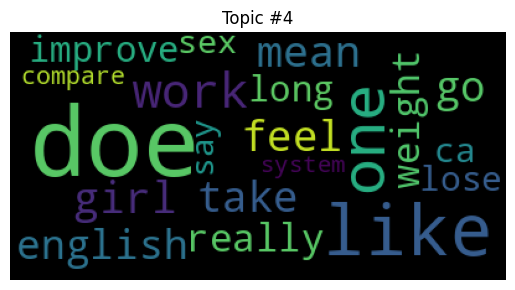

In [ ]:
combined = pd.concat([df_train['question1'], df_train['question2']])

# Create a new DataFrame with the combined values
df_combined = pd.DataFrame({'Combined': combined})
lda_topic_modeling(df_combined, text_column='Combined', num_topics=5)

In [49]:
!git clone https://github.com/moatazaymane/Quora_Question_Pairs.git

Cloning into 'Quora_Question_Pairs'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), 215.79 KiB | 1.16 MiB/s, done.


In [50]:
os.chdir('/content/Quora_Question_Pairs')

In [51]:
%%capture
!pip install -r requirements.txt

In [ ]:
%%capture
!pip uninstall numpy
!pip install numpy

In [ ]:
from sklearn.model_selection import train_test_split
from Data import BERTDataset, get_data_loader
from config import TRAIN_BATCH_SIZE, VALID_BATCH_SIZE
from Bert import BertModel
import engine
import config

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.1, random_state = 42)

In [ ]:
import os
os.chdir('/content/Quora_Question_Pairs')

In [ ]:
train_dataloader = get_data_loader(train_df[['question1','question2']], train_df.is_duplicate, TRAIN_BATCH_SIZE, shuffle = True)
val_dataloader = get_data_loader(val_df[['question1','question2']], val_df.is_duplicate, VALID_BATCH_SIZE, shuffle = False)

### Model

In [ ]:
model = BertModel(config.BERT_PATH).to(config.DEVICE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_df.shape

(363859, 6)

In [ ]:
len(train_dataloader)

5686